# Setup Variables and home directory

MNIST, FashionMNIST, GTSRB, Cifar10

In [1]:
# set homw directory
import os
from pathlib import Path

base = Path().cwd()

if base.name != 'runtime-monitoring':
    os.chdir('../')
    base = Path().cwd()

base

PosixPath('/home/ah19/runtime-monitoring')

In [109]:
DATASET = 'GTSRB'
SEED = 42
CUDA = 0
GPU_NAME = f'cuda:{CUDA}'

In [110]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from fastprogress import progress_bar

from utilities.utils import load_json, load_pickle
from utilities.pathManager import fetchPaths
from utilities.MonitorUnifiedBDD import MonitorBDD

# Paths

In [112]:
paths = fetchPaths(base, DATASET, '', False)

path_data = paths['data']
path_model_stats = paths['saved_models'].parent.parent

# Seed

In [113]:
np.random.seed(SEED)

# Import Data

In [121]:
# import Data
model_stats = pd.read_csv(path_model_stats / f"{DATASET}_model_stats.csv")

for i in range(model_stats.shape[0]):
    model_stats.at[i, 'train_losses'] = ast.literal_eval(model_stats.loc[i, 'train_losses'])
    model_stats.at[i, 'test_losses'] = ast.literal_eval(model_stats.loc[i, 'test_losses'])
    model_stats.at[i, 'train_accs'] = ast.literal_eval(model_stats.loc[i, 'train_accs'])
    model_stats.at[i, 'test_accs'] = ast.literal_eval(model_stats.loc[i, 'test_accs'])

In [122]:
model_stats

,lhl,optim,scheduler,epochs,best_epoch,train_losses,test_losses,train_accs,test_accs,test_loss,test_acc
0,30,AdamW,MultiStepLR,16,5,"[1.090770547861991, 0.5553423764855937, 0.4620...","[0.35838051727539255, 0.2738835567338321, 0.27...","[0.6905797123908997, 0.8324318528175354, 0.856...","[0.8947996497154236, 0.9212786555290222, 0.922...",0.132908,0.954437
1,50,AdamW,MultiStepLR,19,8,"[1.032119691014111, 0.5271015473757463, 0.4516...","[0.339003027679811, 0.28493828562493545, 0.243...","[0.7064626216888428, 0.8388413190841675, 0.859...","[0.9031488299369812, 0.9169847369194031, 0.934...",0.136836,0.964933
2,80,AdamW,MultiStepLR,18,7,"[1.001645063492225, 0.5372965036835028, 0.4557...","[0.3669426899602395, 0.26232243846845993, 0.27...","[0.714451014995575, 0.8356209397315979, 0.8583...","[0.8981392979621887, 0.9246183037757874, 0.915...",0.150521,0.958254
3,150,AdamW,MultiStepLR,17,6,"[0.9685861806740697, 0.5306843919302148, 0.462...","[0.31592916930449827, 0.3715250091129587, 0.56...","[0.7241120934486389, 0.837715744972229, 0.8561...","[0.8979007601737976, 0.895753800868988, 0.8637...",0.127612,0.955630


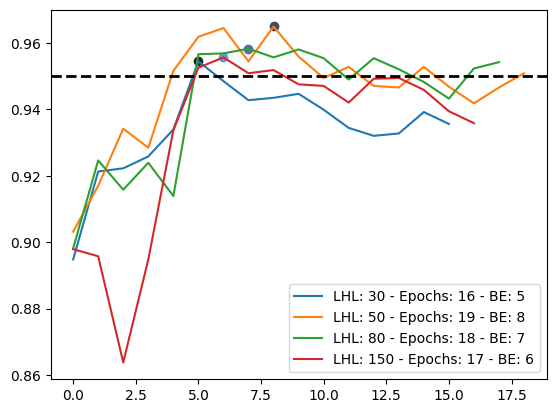

In [135]:
palette = sns.dark_palette('#69d', model_stats.shape[0])

col = 'test_accs'

for i in range(model_stats.shape[0]):
    plt.scatter(model_stats['best_epoch'][i], model_stats['test_acc'][i], color=palette[i])
    sns.lineplot(
        x=range(len(model_stats[col][i])),
        y=model_stats[col][i],
        palette=[palette[i]],
        label=f"LHL: {model_stats['lhl'][i]} - Epochs: {model_stats['epochs'][i]} - BE: {model_stats['best_epoch'][i]}"
    )
    
plt.axhline(0.95, color='black', linewidth=2, linestyle='--')